In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
!ls ./data

FIC.Full CSV.csv
heart.csv
o2Saturation.csv
social media influencers - instagram.csv
social media influencers - tiktok.csv
social media influencers - youtube.csv
social media influencers-instagram june 2022 - june 2022.csv
social media influencers-tiktok june 2022 - june 2022.csv
social media influencers-youtube june 2022 - june 2022.csv


# Data description:
Age : Age of the patient

Gender : gender of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

mortality : 0= less chance of heart attack 1= more chance of heart attack

In [3]:
DATA_PATH = './data'
FILE_NAME = '/FIC.Full CSV.csv'

In [4]:
data = pd.read_csv(DATA_PATH + FILE_NAME)
data

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,NO,...,0.5,2,0,7,3,0,BODY.PAIN,1,0,60
364,55,51-60,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,2.0,2,3,7,3,1,STOMACH.BLEEDING,1,0,36
365,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0.8,1,3,3,1,1,COUGH.BLEEDING,1,0,32
366,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,2.6,2,0,7,4,1,COUGH.BLEEDING,1,0,32


In [5]:
data.columns = list(map(lambda s: s.strip(), data.columns))
data.columns, len(data.columns)

(Index(['Age', 'Age.Group', 'Gender', 'Locality', 'Marital status',
        'Life.Style', 'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
        'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
        'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
        'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
        'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
        'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others', 'CO', 'Diagnosis',
        'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
        'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
       dtype='object'),
 60)

In [6]:
list(map(lambda s: s.strip(), data.columns)), len(data.columns)

(['Age',
  'Age.Group',
  'Gender',
  'Locality',
  'Marital status',
  'Life.Style',
  'Sleep',
  'Category',
  'Depression',
  'Hyperlipi',
  'Smoking',
  'Family.History',
  'F.History',
  'Diabetes',
  'HTN',
  'Allergies',
  'BP',
  'Thrombolysis',
  'BGR',
  'B.Urea',
  'S.Cr',
  'S.Sodium',
  'S.Potassium',
  'S.Chloride',
  'C.P.K',
  'CK.MB',
  'ESR',
  'WBC',
  'RBC',
  'Hemoglobin',
  'P.C.V',
  'M.C.V',
  'M.C.H',
  'M.C.H.C',
  'PLATELET_COUNT',
  'NEUTROPHIL',
  'LYMPHO',
  'MONOCYTE',
  'EOSINO',
  'Others',
  'CO',
  'Diagnosis',
  'Hypersensitivity',
  'cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'thalach',
  'exang',
  'oldpeak',
  'slope',
  'ca',
  'thal',
  'num',
  'SK',
  'SK.React',
  'Reaction',
  'Mortality',
  'Follow.Up'],
 60)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               368 non-null    int64  
 1   Age.Group         368 non-null    object 
 2   Gender            368 non-null    object 
 3   Locality          368 non-null    object 
 4   Marital status    368 non-null    object 
 5   Life.Style        368 non-null    object 
 6   Sleep             368 non-null    object 
 7   Category          368 non-null    object 
 8   Depression        368 non-null    object 
 9   Hyperlipi         368 non-null    object 
 10  Smoking           368 non-null    object 
 11  Family.History    368 non-null    object 
 12  F.History         368 non-null    int64  
 13  Diabetes          368 non-null    int64  
 14  HTN               368 non-null    object 
 15  Allergies         368 non-null    object 
 16  BP                368 non-null    float64
 1

In [8]:
data.describe()

,Age,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,...,exang,oldpeak,slope,ca,thal,num,SK,Reaction,Mortality,Follow.Up
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,...,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,54.293478,0.195652,0.461957,121.213315,0.032609,219.991848,51.681522,1.716902,138.019022,4.210870,...,0.562500,1.541848,1.842391,1.002717,5.858696,2.035326,0.983696,0.747283,0.217391,28.652174
std,8.718158,0.397242,0.499229,24.539205,0.177852,139.337387,62.582571,3.609296,4.079879,0.394984,...,0.496754,1.385381,0.564284,1.037442,1.744319,1.031573,0.126816,0.435162,0.413033,15.811860
min,24.000000,0.000000,0.000000,80.500000,0.000000,60.000000,2.300000,0.600000,129.000000,3.300000,...,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,50.750000,0.000000,0.000000,100.700000,0.000000,117.000000,28.000000,0.900000,135.000000,3.900000,...,0.000000,0.275000,1.750000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,15.000000
50%,55.000000,0.000000,0.000000,120.800000,0.000000,164.000000,36.000000,0.900000,138.000000,4.200000,...,1.000000,1.200000,2.000000,1.000000,7.000000,2.000000,1.000000,1.000000,0.000000,32.000000
75%,60.250000,0.000000,1.000000,140.700000,0.000000,291.000000,43.000000,1.100000,141.000000,4.400000,...,1.000000,2.200000,2.000000,2.000000,7.000000,3.000000,1.000000,1.000000,0.000000,36.000000
max,77.000000,1.000000,1.000000,190.110000,1.000000,563.000000,394.000000,22.900000,146.000000,5.300000,...,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000,1.000000,1.000000,60.000000


In [9]:
data['Diagnosis'].unique(), data['Diagnosis'].unique().size

(array(['EXT. ACUTE WALL M.I', 'A/W M.I', 'AC I/W M.I (RV) RE. M.I ',
        'I/W M.I', 'ACS, NSTEMI', 'AC I/W M.I', 'A/S WALL M.I',
        'INF WALL M.I', 'POSTERIOR WALL M.I', 'Inf. Wall M.I',
        'Acute I/W M.I', 'Ac I/P M.Iwith RV Infarct', 'ACUTE I/W M.I',
        'M.I ,ACS', 'STEMI', 'AC. WALL M.I', 'A/C, A/W M.I',
        'CARDIOGENIC SHOCK', 'NSTEM.I', 'I/P M.I', 'SEVERE MR, MVR',
        'Ext. Ant wall M.I', 'old I/W M.I, ACS.', 'A LATERAL WALL M.I',
        'A/S M.I', 'A/CI/W M.I', 'Acute and Ant Wall MI, ACS.',
        'A/L WALL M.I', 'ST-T ELEVATION POST SK', 'AC. I/W M.I',
        'ACS. ACUTE LEFT WALL M.I', 'Inf wall M.I', 'AC. I/W M.I, SHOCK',
        'AC. A/W M.I', 'Inf wall RE. M.I', 'AC.LBBB', 'AC. A/L M.I'],
       dtype=object),
 37)

# Basic visualization:

In [10]:
sns.set_style('darkgrid')
sns.set(font_scale=1.4)

[Text(0, 0, 'AC I/W M.I'),
 Text(1, 0, 'A/W M.I'),
 Text(2, 0, 'I/W M.I'),
 Text(3, 0, 'Acute I/W M.I'),
 Text(4, 0, 'INF WALL M.I'),
 Text(5, 0, 'ACS, NSTEMI'),
 Text(6, 0, 'NSTEM.I'),
 Text(7, 0, 'A/S WALL M.I'),
 Text(8, 0, 'M.I ,ACS'),
 Text(9, 0, 'A/C, A/W M.I'),
 Text(10, 0, 'AC. WALL M.I'),
 Text(11, 0, 'STEMI'),
 Text(12, 0, 'Ac I/P M.Iwith RV Infarct'),
 Text(13, 0, 'ACUTE I/W M.I'),
 Text(14, 0, 'Inf. Wall M.I'),
 Text(15, 0, 'POSTERIOR WALL M.I'),
 Text(16, 0, 'A/CI/W M.I'),
 Text(17, 0, 'AC. I/W M.I'),
 Text(18, 0, 'ACS. ACUTE LEFT WALL M.I'),
 Text(19, 0, 'ST-T ELEVATION POST SK'),
 Text(20, 0, 'A/L WALL M.I'),
 Text(21, 0, 'Acute and Ant Wall MI, ACS.'),
 Text(22, 0, 'EXT. ACUTE WALL M.I'),
 Text(23, 0, 'AC I/W M.I (RV) RE. M.I '),
 Text(24, 0, 'A LATERAL WALL M.I'),
 Text(25, 0, 'old I/W M.I, ACS.'),
 Text(26, 0, 'Ext. Ant wall M.I'),
 Text(27, 0, 'SEVERE MR, MVR'),
 Text(28, 0, 'I/P M.I'),
 Text(29, 0, 'CARDIOGENIC SHOCK'),
 Text(30, 0, 'A/S M.I'),
 Text(31, 0, 'Inf wal

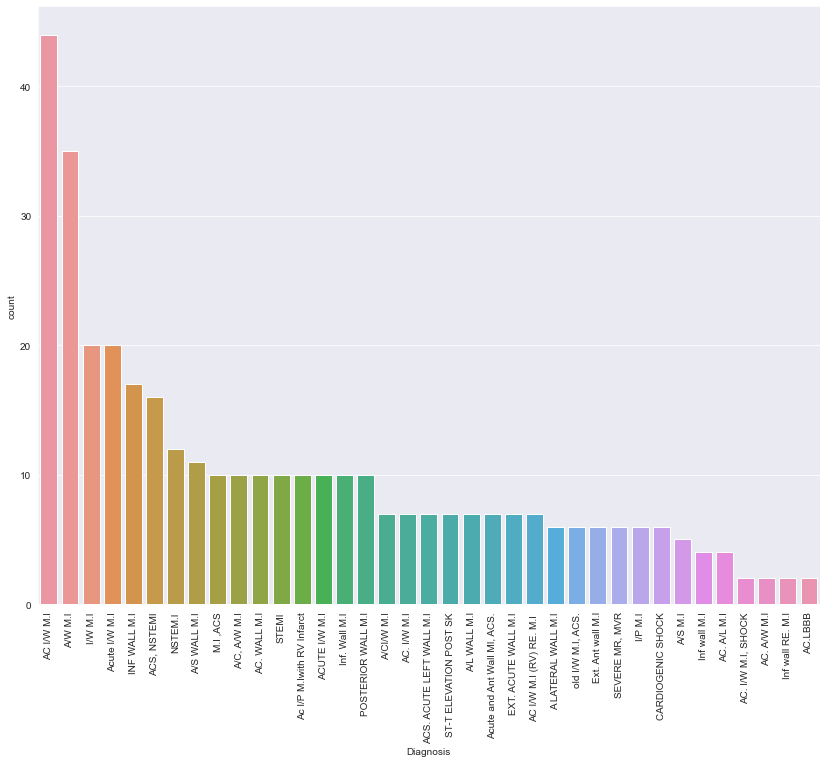

In [11]:
plt.figure(figsize=(14, 11))
chart = sns.countplot(data=data, x='Diagnosis', order=data['Diagnosis'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

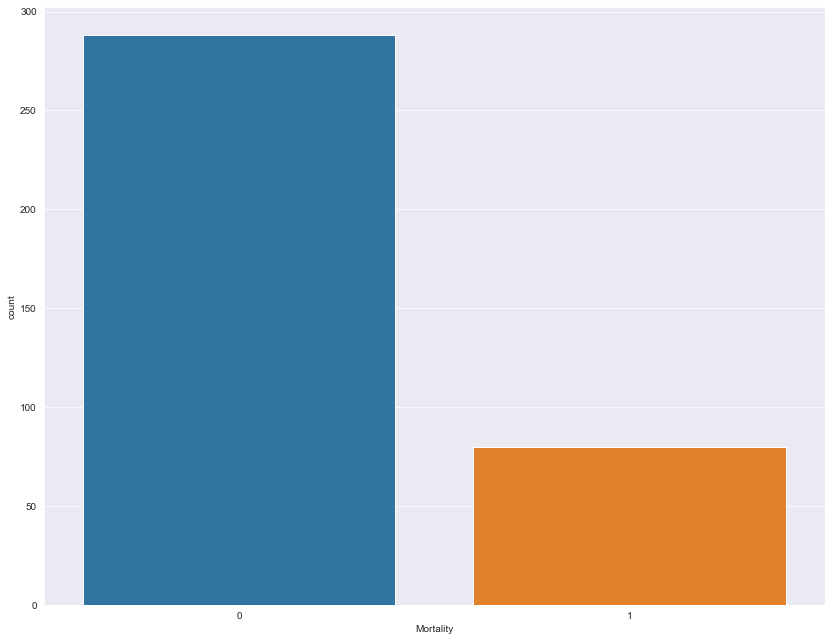

In [12]:
plt.figure(figsize=(14, 11))
chart = sns.countplot(data=data, x='Mortality', order=data['Mortality'].value_counts().index)

## Diagnoses distirbuting according to age group

[Text(0, 0, 'AC I/W M.I'),
 Text(1, 0, 'A/W M.I'),
 Text(2, 0, 'I/W M.I'),
 Text(3, 0, 'Acute I/W M.I'),
 Text(4, 0, 'INF WALL M.I'),
 Text(5, 0, 'ACS, NSTEMI'),
 Text(6, 0, 'NSTEM.I'),
 Text(7, 0, 'A/S WALL M.I'),
 Text(8, 0, 'M.I ,ACS'),
 Text(9, 0, 'A/C, A/W M.I'),
 Text(10, 0, 'AC. WALL M.I'),
 Text(11, 0, 'STEMI'),
 Text(12, 0, 'Ac I/P M.Iwith RV Infarct'),
 Text(13, 0, 'ACUTE I/W M.I'),
 Text(14, 0, 'Inf. Wall M.I'),
 Text(15, 0, 'POSTERIOR WALL M.I'),
 Text(16, 0, 'A/CI/W M.I'),
 Text(17, 0, 'AC. I/W M.I'),
 Text(18, 0, 'ACS. ACUTE LEFT WALL M.I'),
 Text(19, 0, 'ST-T ELEVATION POST SK'),
 Text(20, 0, 'A/L WALL M.I'),
 Text(21, 0, 'Acute and Ant Wall MI, ACS.'),
 Text(22, 0, 'EXT. ACUTE WALL M.I'),
 Text(23, 0, 'AC I/W M.I (RV) RE. M.I '),
 Text(24, 0, 'A LATERAL WALL M.I'),
 Text(25, 0, 'old I/W M.I, ACS.'),
 Text(26, 0, 'Ext. Ant wall M.I'),
 Text(27, 0, 'SEVERE MR, MVR'),
 Text(28, 0, 'I/P M.I'),
 Text(29, 0, 'CARDIOGENIC SHOCK'),
 Text(30, 0, 'A/S M.I'),
 Text(31, 0, 'Inf wal

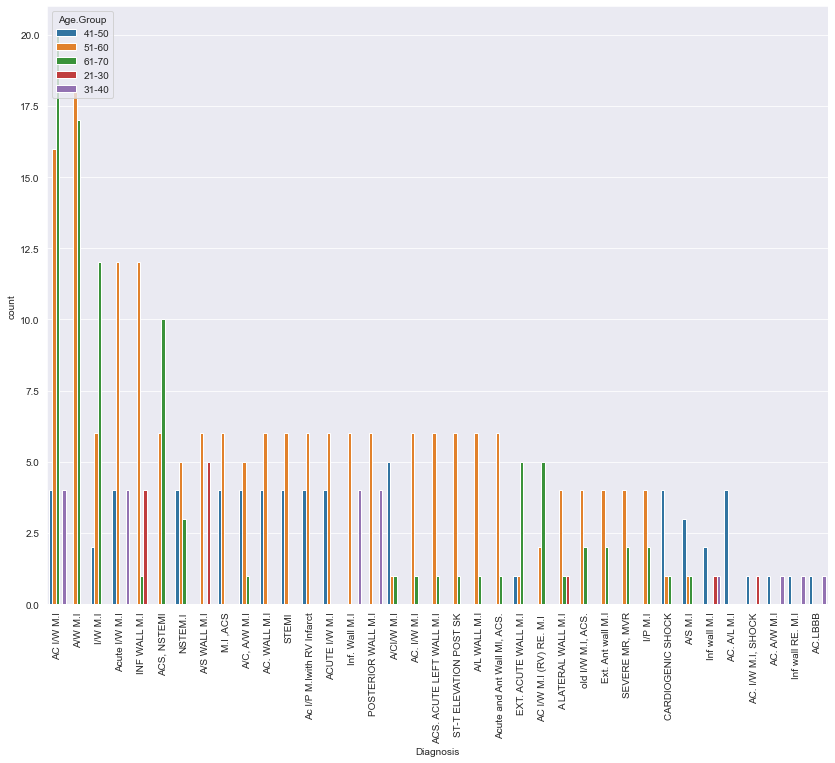

In [13]:
plt.figure(figsize=(14, 11))
chart = sns.countplot(data=data, x='Diagnosis', hue='Age.Group', order=data['Diagnosis'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

# Mortality rate for men and women

Text(0, 0.5, 'Per Gender')

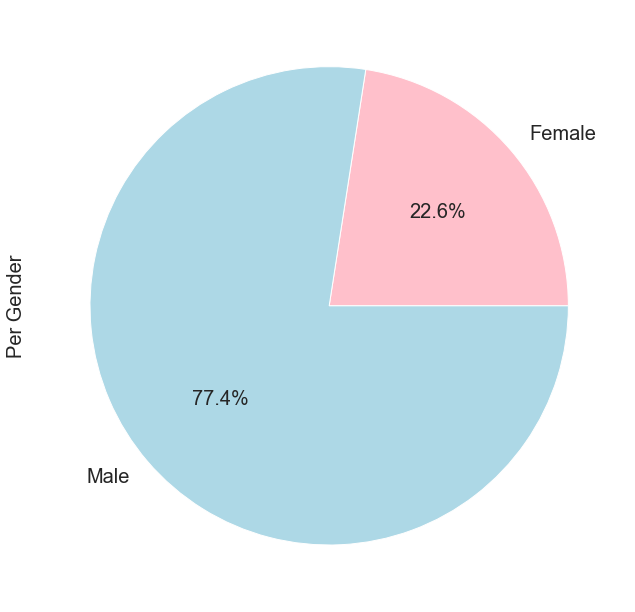

In [14]:
plt.figure(figsize=(14, 11))
data.groupby('Gender').size().plot.pie(autopct="%.1f%%", colors=['pink', 'lightblue'], textprops={'fontsize': 20}, ylabel='Per Gender')
plt.ylabel('Per Gender', fontsize=20)

## Mortality per Age Group

Text(0, 0.5, 'Per Age Group')

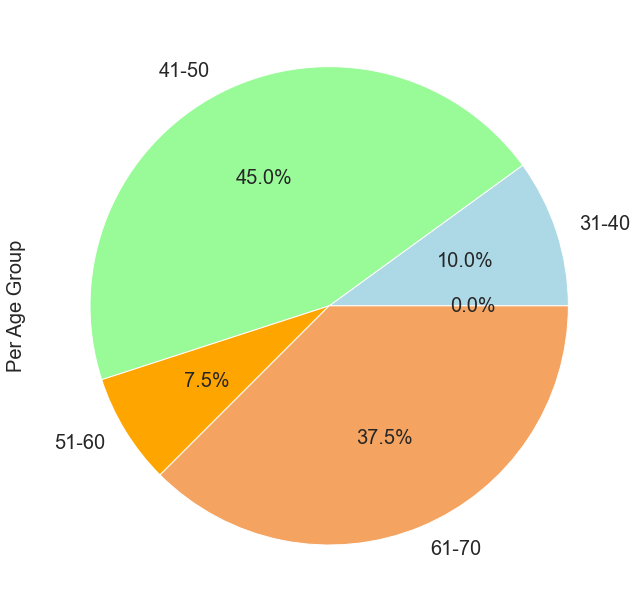

In [15]:
plt.figure(figsize=(14, 11))
data.groupby('Age.Group')['Mortality'].sum().plot.pie(autopct="%.1f%%", textprops={'fontsize': 20}, colors=['salmon','lightblue','palegreen','orange', 'sandybrown'])
plt.ylabel('Per Age Group', fontsize=20)

In [16]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

[Text(0, 0, 'AC I/W M.I'),
 Text(1, 0, 'A/W M.I'),
 Text(2, 0, 'I/W M.I'),
 Text(3, 0, 'Acute I/W M.I'),
 Text(4, 0, 'INF WALL M.I'),
 Text(5, 0, 'ACS, NSTEMI'),
 Text(6, 0, 'NSTEM.I'),
 Text(7, 0, 'A/S WALL M.I'),
 Text(8, 0, 'M.I ,ACS'),
 Text(9, 0, 'A/C, A/W M.I'),
 Text(10, 0, 'AC. WALL M.I'),
 Text(11, 0, 'STEMI'),
 Text(12, 0, 'Ac I/P M.Iwith RV Infarct'),
 Text(13, 0, 'ACUTE I/W M.I'),
 Text(14, 0, 'Inf. Wall M.I'),
 Text(15, 0, 'POSTERIOR WALL M.I'),
 Text(16, 0, 'A/CI/W M.I'),
 Text(17, 0, 'AC. I/W M.I'),
 Text(18, 0, 'ACS. ACUTE LEFT WALL M.I'),
 Text(19, 0, 'ST-T ELEVATION POST SK'),
 Text(20, 0, 'A/L WALL M.I'),
 Text(21, 0, 'Acute and Ant Wall MI, ACS.'),
 Text(22, 0, 'EXT. ACUTE WALL M.I'),
 Text(23, 0, 'AC I/W M.I (RV) RE. M.I '),
 Text(24, 0, 'A LATERAL WALL M.I'),
 Text(25, 0, 'old I/W M.I, ACS.'),
 Text(26, 0, 'Ext. Ant wall M.I'),
 Text(27, 0, 'SEVERE MR, MVR'),
 Text(28, 0, 'I/P M.I'),
 Text(29, 0, 'CARDIOGENIC SHOCK'),
 Text(30, 0, 'A/S M.I'),
 Text(31, 0, 'Inf wal

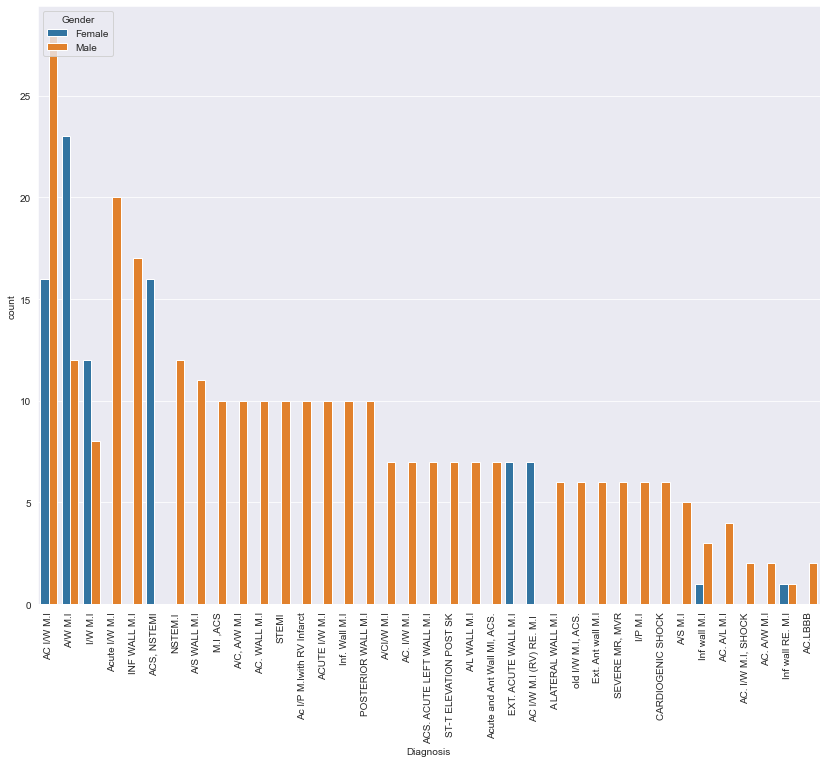

In [17]:
plt.figure(figsize=(14, 11))
chart = sns.countplot(data=data, x='Diagnosis', hue='Gender', order=data['Diagnosis'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

### Trying to identify meaningfull features:
_Note: we have 42 numerical features, if we want to print 4x4 matrices of pair plot, to see which of them are correlated, we would end up having 111 930 (combinations without permutations) plots =O, which is a lot, and we will only go with random 10 of them, just to get a quick glance on what is going on with the data in general, in real life we would also use some subject area knowledge to compare less features, but since we have none, will just try to do rely on luck._ 

In [18]:
data.corr().style.background_gradient(cmap='coolwarm')

,Age,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,S.Chloride,C.P.K,CK.MB,ESR,WBC,RBC,Hemoglobin,P.C.V,M.C.V,M.C.H,M.C.H.C,PLATELET_COUNT,NEUTROPHIL,LYMPHO,MONOCYTE,EOSINO,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,SK,Reaction,Mortality,Follow.Up
Age,1.000000,-0.165327,0.231081,-0.034220,0.101008,-0.073223,0.019354,-0.012162,0.020679,0.063956,-0.041241,0.013986,0.008096,0.133288,0.021253,-0.228885,-0.196796,-0.275455,0.047740,0.038319,0.077964,0.053814,-0.027498,-0.126546,-0.127239,0.032950,0.039433,0.300752,0.184823,0.121626,0.128239,-0.099504,-0.160281,0.103862,0.147343,0.438851,-0.261194,0.117005,-0.076990,-0.288514,-0.099490,0.172255
F.History,-0.165327,1.000000,-0.058543,0.091555,-0.090549,0.043054,-0.169806,-0.105735,-0.099815,-0.211563,0.084472,-0.201974,-0.177722,-0.158894,-0.003611,0.188856,0.233495,0.251045,0.126707,0.144134,0.045173,0.168242,-0.083199,0.062637,0.231251,0.122141,-0.118271,-0.166791,-0.086715,0.016245,0.032535,0.054135,0.006904,-0.117903,-0.080862,0.005318,0.032143,-0.023562,0.063495,0.271048,-0.127081,0.068126
Diabetes,0.231081,-0.058543,1.000000,0.013709,-0.170121,-0.239477,0.220138,0.211144,0.029119,0.086394,0.089779,-0.152688,-0.147871,0.151599,-0.219596,-0.362756,-0.206784,-0.228416,0.193122,0.201338,0.235858,0.199709,-0.153392,-0.128461,0.067701,0.003587,0.055767,0.093861,0.087997,-0.078578,-0.090400,-0.017580,-0.028842,-0.039453,0.085054,0.050180,-0.090673,-0.010611,0.119293,-0.426921,0.317722,-0.048281
BP,-0.034220,0.091555,0.013709,1.000000,-0.116225,0.084895,-0.032729,-0.044125,-0.177179,0.174460,-0.239659,-0.105416,-0.123487,0.061022,-0.102775,0.132886,0.037351,0.027234,-0.103124,-0.076072,0.016414,0.000216,0.467607,0.137954,0.173294,0.062229,0.013485,-0.126641,-0.070075,0.067410,0.000630,0.026236,0.025394,-0.161551,-0.130320,-0.077802,-0.082335,-0.062612,0.002171,0.116646,-0.041203,0.158229
Thrombolysis,0.101008,-0.090549,-0.170121,-0.116225,1.000000,-0.014503,-0.018159,-0.044157,0.134328,0.088032,-0.184543,0.272738,0.218080,0.064527,-0.093091,-0.200102,-0.217699,-0.230778,-0.074875,-0.054709,0.041870,-0.146585,-0.030007,-0.052454,-0.087710,-0.053574,-0.139840,-0.074861,0.057068,-0.030555,-0.044371,0.051911,-0.177338,-0.079647,-0.084403,-0.118623,-0.055372,-0.021147,-0.701222,0.106768,-0.096764,0.201706
BGR,-0.073223,0.043054,-0.239477,0.084895,-0.014503,1.000000,-0.182553,-0.191250,0.104572,-0.118751,-0.106674,0.086361,0.030095,-0.086750,0.043823,0.098862,0.015492,0.025958,0.017635,-0.045096,-0.201220,-0.120391,0.038893,-0.223353,0.050214,0.025673,-0.116670,-0.068645,-0.096327,-0.011581,-0.064468,0.071840,0.026796,0.044553,0.000053,-0.048990,0.172845,-0.026557,-0.065698,0.332733,-0.113078,0.230562
B.Urea,0.019354,-0.169806,0.220138,-0.032729,-0.018159,-0.182553,1.000000,0.958810,-0.189550,0.461917,0.243662,0.061884,0.068208,0.180587,0.307613,-0.147607,-0.089598,-0.132850,0.010179,0.037336,0.078058,0.009810,-0.060807,-0.225276,-0.265038,-0.088913,0.079521,0.200920,0.106410,0.107455,0.085138,0.053869,0.098115,-0.104570,-0.015368,-0.070728,0.029729,0.032640,0.030243,-0.025275,0.069328,-0.176444
S.Cr,-0.012162,-0.105735,0.211144,-0.044125,-0.044157,-0.191250,0.958810,1.000000,-0.225766,0.368047,0.189967,0.080177,0.084105,0.075669,0.337761,-0.011515,0.038986,-0.000824,0.005670,0.030404,0.043208,-0.001450,-0.031254,-0.177302,-0.253756,-0.065859,0.061095,0.171060,0.068214,0.108479,0.150860,0.039285,0.105837,-0.107096,0.027721,-0.073509,0.050594,0.069217,0.039894,0.032497,0.082850,-0.156134
S.Sodium,0.020679,-0.099815,0.029119,-0.177179,0.134328,0.104572,-0.189550,-0.225766,1.000000,-0.149939,0.059592,0.060512,0.001008,-0.181686,-0.205675,-0.284549,-0.073632,-0.125085,0.367658,0.338041,0.022771,0.197956,-0.043389,0.132594,0.178535,0.192925,0.059886,-0.038146,0.048530,0.074694,0.037260,0.137656,0.005462,0.059878,-0.096929,-0.037350,0.010334,-0.013756,0.032199,-0.072487,-0.021864,0.083227
S.Potassium,0.063956,-0.211563,0.086394,0.174460,0.088032,-

In [20]:
corr_matrix = data.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] >= 0.8)]
to_drop

['S.Cr', 'CK.MB', 'P.C.V', 'M.C.H']

In [21]:
data_corr_cleaned = data.drop(to_drop, axis=1)
data_corr_cleaned

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,NO,...,0.5,2,0,7,3,0,BODY.PAIN,1,0,60
364,55,51-60,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,2.0,2,3,7,3,1,STOMACH.BLEEDING,1,0,36
365,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0.8,1,3,3,1,1,COUGH.BLEEDING,1,0,32
366,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,2.6,2,0,7,4,1,COUGH.BLEEDING,1,0,32


Index(['BP', 'B.Urea', 'S.Potassium', 'RBC'], dtype='object')
Index(['Hemoglobin', 'M.C.V', 'M.C.H.C', 'NEUTROPHIL'], dtype='object')
Index(['LYMPHO', 'MONOCYTE', 'oldpeak'], dtype='object')


<Figure size 1008x792 with 0 Axes>

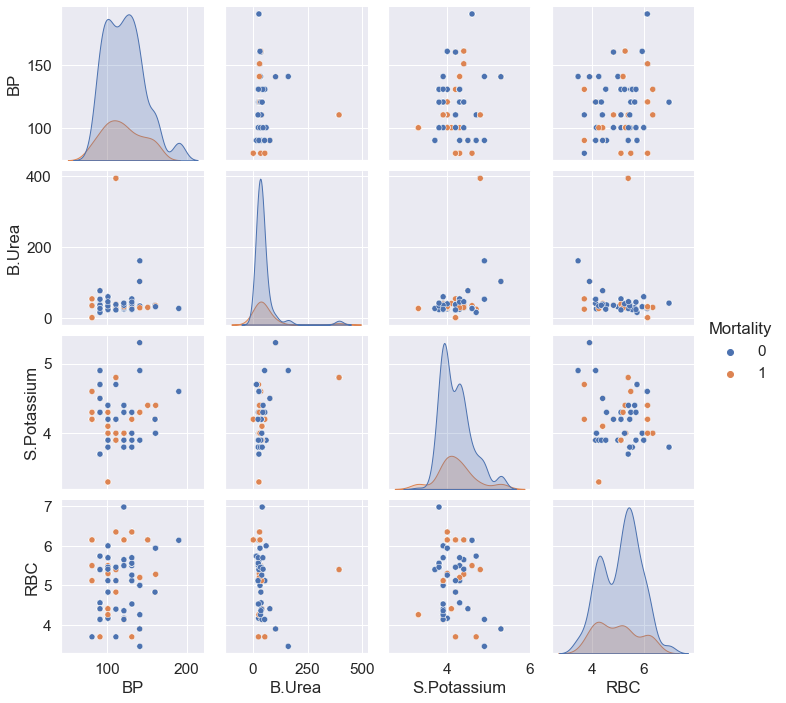

<Figure size 1008x792 with 0 Axes>

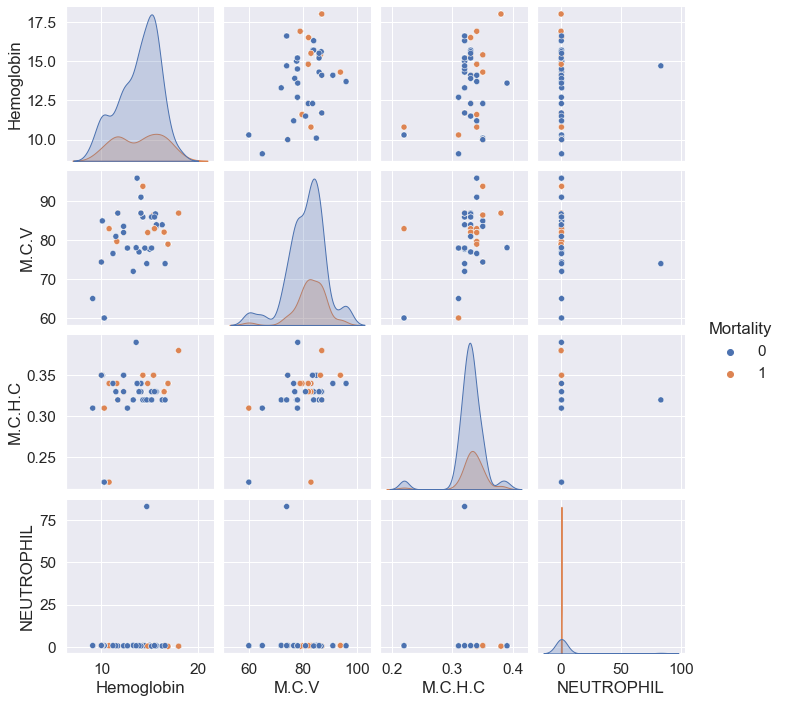

<Figure size 1008x792 with 0 Axes>

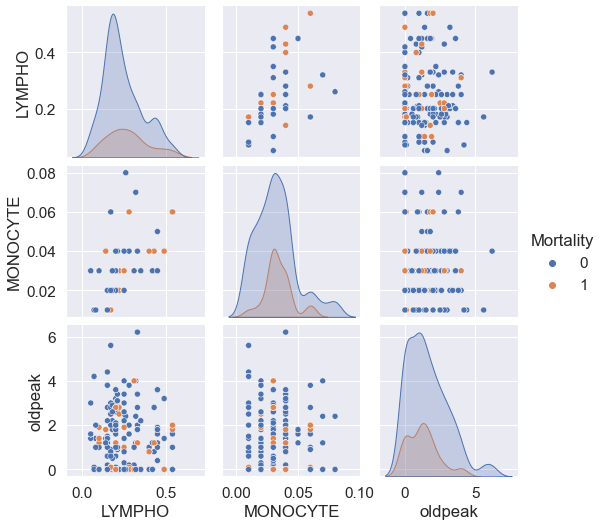

<Figure size 1008x792 with 0 Axes>

In [86]:
window_size = 4
data_numeric = data_corr_cleaned.select_dtypes([np.float64])
for i in range(0, len(data_numeric), window_size):
    plt.figure(figsize=(14, 11))
    if len(data_numeric.columns[i:i+window_size]) == 0:
        break
    print(data_numeric.columns[i:i+window_size])
    sns.pairplot(pd.concat([data_numeric.loc[:, data_numeric.columns[i:i+window_size]], data['Mortality']], axis=1), hue='Mortality')
plt.show()

# Adding more data...
After basic review of the data patterns it seems clear, that we cannot expect to retrieve a lot of valuable information from the data we have. Reasons for that are: small dataset, and lack balance in data distribution, to solve that we will try to add more data and get some valuable results with that.

In [23]:
FILE_ADD_NAME = '/heart.csv'

In [24]:
data_add = pd.read_csv(DATA_PATH + FILE_ADD_NAME)
data_add

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [25]:
data_add = data_add.rename(columns={'output': 'mortality', 'sex': 'gender'})
data_add

,age,gender,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,mortality
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Merging data

## Making adjustments

In [26]:
data_old = data.rename(columns={
    'Age': 'age', 
    'Gender': 'gender', 
    'trestbps': 'trtbps', 
    'rest_ecg': 'restecg', 
    'Mortality': 'mortality', 
    'thalach': 'thalachh', 
    'exang': 'exng', 
    'slope': 'slp', 
    'ca': 'caa', 
    'thal': 'thall'})[data_add.columns]
data_old

,age,gender,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,mortality
0,45,Female,4,132,341,1,2,136,1,3.0,2,0,7,0
1,51,Female,4,130,305,0,0,142,1,1.2,2,0,7,0
2,55,Female,4,180,327,0,1,117,1,3.4,2,0,3,0
3,55,Female,4,128,205,0,1,130,1,2.0,2,1,7,0
4,56,Female,4,200,288,1,2,133,1,4.0,3,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,Male,4,124,274,0,2,166,0,0.5,2,0,7,0
364,55,Male,3,120,188,0,0,139,0,2.0,2,3,7,0
365,58,Male,3,118,149,0,2,126,0,0.8,1,3,3,0
366,58,Male,4,150,243,0,2,128,0,2.6,2,0,7,0


In [27]:
data_add

,age,gender,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,mortality
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [28]:
data_add['cp'].unique(), data_old['cp'].unique()

(array([3, 2, 1, 0]), array([4, 2, 3, 1]))

In [29]:
data_add['gender'].unique(), data_old['gender'].unique()

(array([1, 0]), array(['Female', 'Male'], dtype=object))

In [30]:
data_old['gender'] = data_old['gender'].apply(lambda x: 0 if x == 'Female' else 1)

In [31]:
data_old['cp'] = data_old['cp'] - 1

In [32]:
data_old

,age,gender,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,mortality
0,45,0,3,132,341,1,2,136,1,3.0,2,0,7,0
1,51,0,3,130,305,0,0,142,1,1.2,2,0,7,0
2,55,0,3,180,327,0,1,117,1,3.4,2,0,3,0
3,55,0,3,128,205,0,1,130,1,2.0,2,1,7,0
4,56,0,3,200,288,1,2,133,1,4.0,3,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,1,3,124,274,0,2,166,0,0.5,2,0,7,0
364,55,1,2,120,188,0,0,139,0,2.0,2,3,7,0
365,58,1,2,118,149,0,2,126,0,0.8,1,3,3,0
366,58,1,3,150,243,0,2,128,0,2.6,2,0,7,0


In [33]:
data_add

,age,gender,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,mortality
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Getting full data together

In [34]:
data_full = pd.concat([data_add, data_old]).reset_index(drop=True)
data_full

,age,gender,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,mortality
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,55,1,3,124,274,0,2,166,0,0.5,2,0,7,0
667,55,1,2,120,188,0,0,139,0,2.0,2,3,7,0
668,58,1,2,118,149,0,2,126,0,0.8,1,3,3,0
669,58,1,3,150,243,0,2,128,0,2.6,2,0,7,0


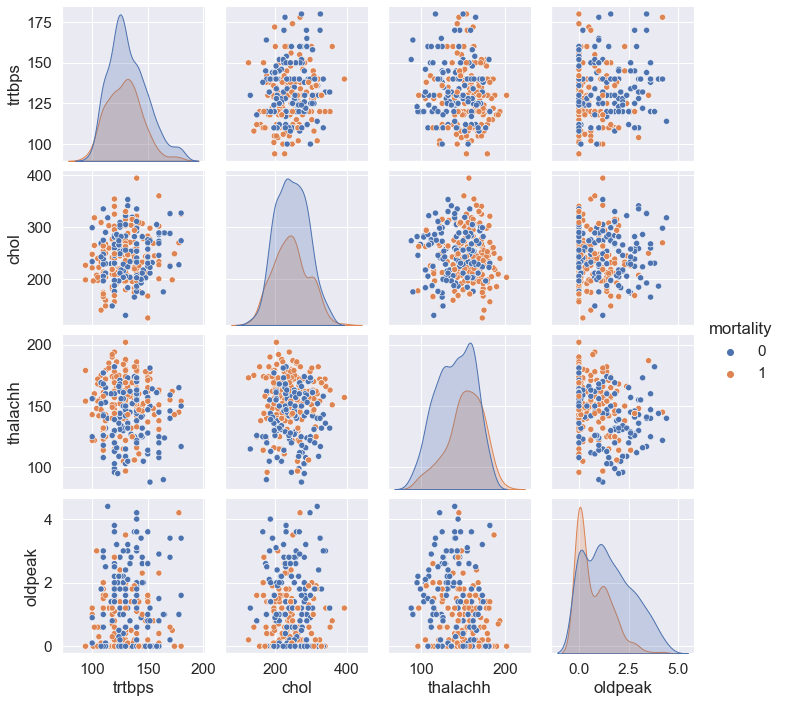

In [89]:
sns.pairplot(data_full[['trtbps', 'chol', 'thalachh', 'oldpeak', 'mortality']], hue='mortality')

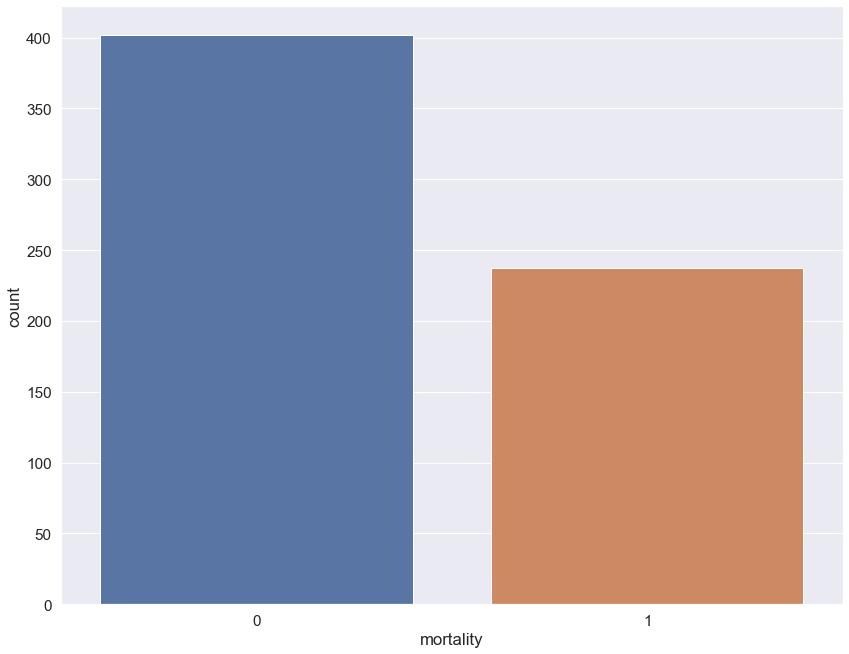

In [90]:
plt.figure(figsize=(14, 11))
chart = sns.countplot(data=data_full, x='mortality', order=data_full['mortality'].value_counts().index)

# Data preprocessing 

In [36]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

## Looking for the outliers

<AxesSubplot:>

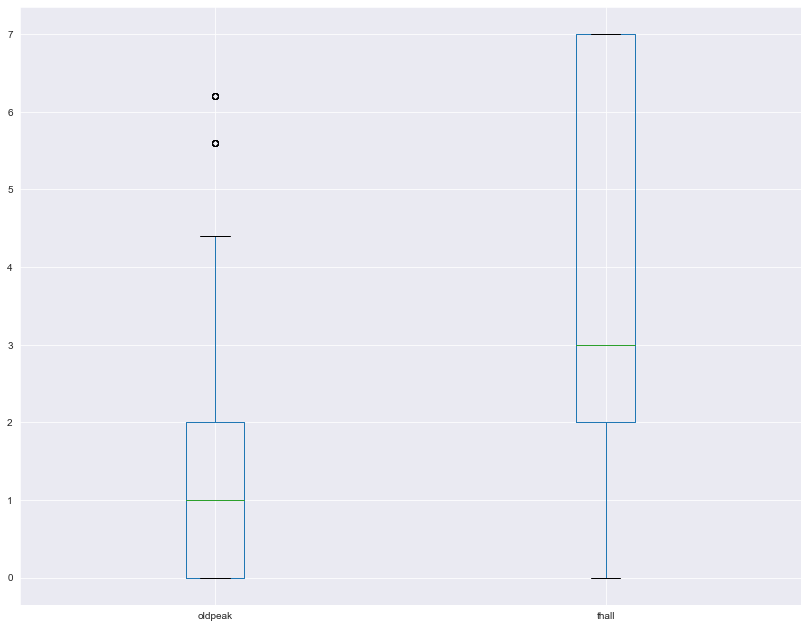

In [37]:
plt.figure(figsize=(14, 11))
data_full[['oldpeak', 'thall']].boxplot()

<AxesSubplot:>

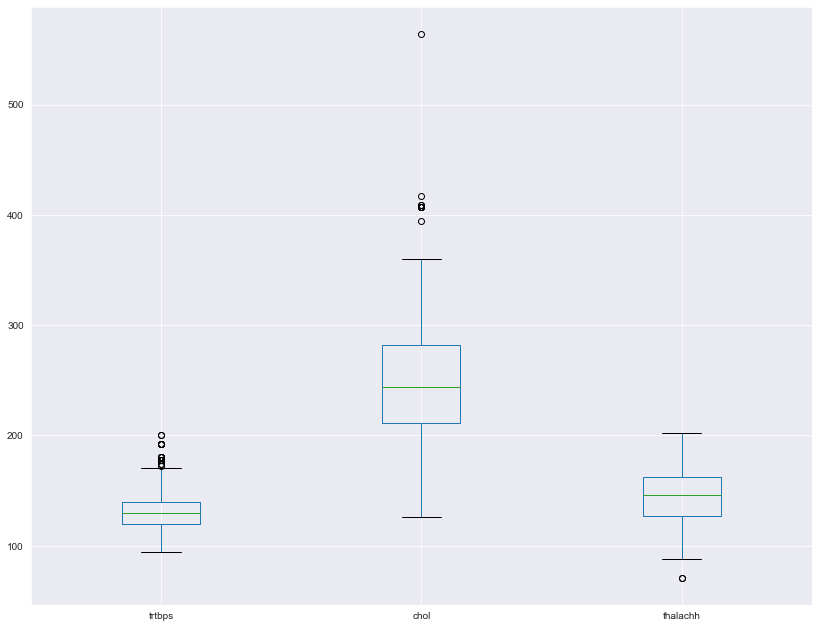

In [38]:
plt.figure(figsize=(14, 11))
data_full[['trtbps', 'chol', 'thalachh']].boxplot()

### Calculating z-score and remove everything that is beyond 3 standard deviations (our baseline)

In [39]:
z_scores = np.abs(np.abs(stats.zscore(data_full[['trtbps', 'chol', 'thalachh', 'oldpeak', 'thall']])))
filtered_entries = (z_scores < 3).all(axis=1)
data_full = data_full[filtered_entries]
data_full

,age,gender,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,mortality
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,55,1,3,124,274,0,2,166,0,0.5,2,0,7,0
667,55,1,2,120,188,0,0,139,0,2.0,2,3,7,0
668,58,1,2,118,149,0,2,126,0,0.8,1,3,3,0
669,58,1,3,150,243,0,2,128,0,2.6,2,0,7,0


# Split the data

In [40]:
X, y = data_full.drop(columns=['mortality']), data_full['mortality']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=17)

In [42]:
X_train

,age,gender,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
492,24,1,3,120,198,0,0,130,1,1.6,2,0,7
661,52,1,3,140,311,0,0,120,1,1.8,2,2,7
361,52,1,3,128,204,1,0,156,1,1.0,2,0,7
537,55,1,3,160,289,0,2,145,1,0.8,2,1,7
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,64,1,2,125,309,0,0,131,1,1.8,2,0,7
405,60,1,3,130,253,0,0,144,1,1.4,1,1,7
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3


# Data review and preliminary analysis summary:
- We have eliminated all the categorical features so far, that makes it simplier to work with the data in the future.
- We have eliminated the excessive features, and make data look cleaner, and we also merged 2 datasets making the data twice bigger, which is a significant change and improvement.
- We will neet to normalize all the data (we might have used some models like lightboost, which does the normalization itself, but it will not give any good result with so poor data quantity, so we'd go with some simple models like random forest, for feature importance and the baseline, and SVM and Naive Bayes. Any deep learning models which have millions of parameters will certainly fail here, because of the lack of data.

## Task formulation:
- Prediction of the mortality (basicaly a binary classification task)
    - We also have biased target variable distribution, but that differance is not as critical as it was at first, so we probably won't balance it, because we will lose a lot of data, and in the situation of lack, that is not an option.

# Classifying with Random Forest 
_(to get feature importance and some baseline for the model)_

In [72]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [73]:
pipe = make_pipeline(StandardScaler(), RandomForestClassifier())
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [74]:
pipe.fit(X_train, y_train)

predict_test = pipe.predict(X_test)
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       124
           1       0.85      0.91      0.88        68

    accuracy                           0.91       192
   macro avg       0.90      0.91      0.90       192
weighted avg       0.91      0.91      0.91       192



## Confusion matrix for Random forest

<AxesSubplot:>

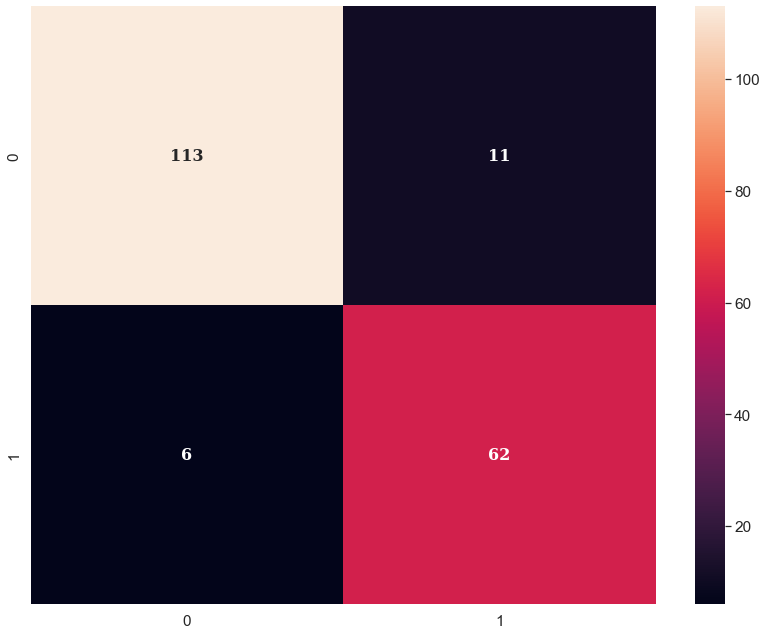

In [75]:
plt.figure(figsize=(14, 11))
sns.heatmap(confusion_matrix(y_test, predict_test), annot=True, annot_kws={
                'fontsize': 16,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            }, fmt='g')

In [76]:
importances = pd.Series(pipe.steps[1][1].feature_importances_, index=X_train.columns)
importances

age         0.112299
gender      0.038959
cp          0.041581
trtbps      0.078517
chol        0.099853
fbs         0.011755
restecg     0.039610
thalachh    0.110291
exng        0.059092
oldpeak     0.103806
slp         0.032625
caa         0.109444
thall       0.162166
dtype: float64

## Feature importances

<AxesSubplot:>

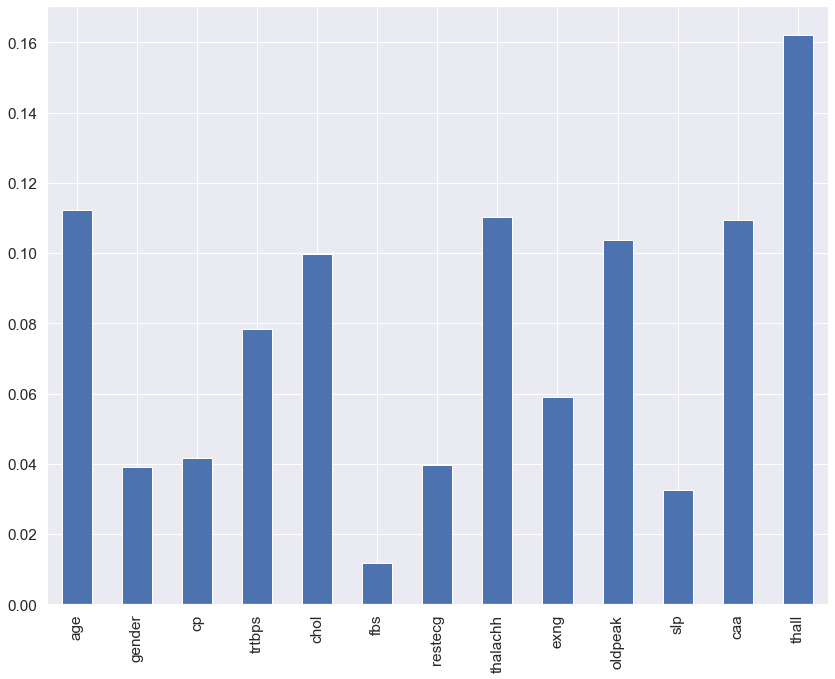

In [77]:
importances.plot.bar(figsize=(14, 11))

# Classifying with Support Vector Classifier

In [78]:
from sklearn.svm import SVC

In [79]:
pipe = make_pipeline(StandardScaler(), SVC())
pipe

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [80]:
pipe.fit(X_train, y_train)

predict_test = pipe.predict(X_test)
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       124
           1       0.77      0.74      0.75        68

    accuracy                           0.83       192
   macro avg       0.81      0.81      0.81       192
weighted avg       0.83      0.83      0.83       192



## Confusion matrix for SVM

<AxesSubplot:>

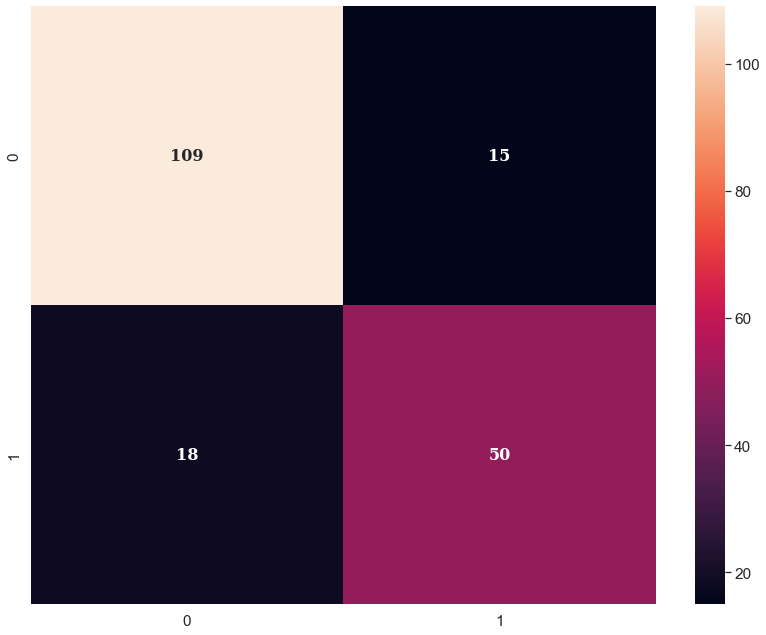

In [81]:
plt.figure(figsize=(14, 11))
sns.heatmap(confusion_matrix(y_test, predict_test), annot=True, annot_kws={
                'fontsize': 16,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            }, fmt='g')

# Classifying with Naive Bayes
## Basic model
Note: Naive Bayes is build with an assumption that features are independent randomly distributed variables, which might not be the truth, we can take a look at the pairplot (of course correlation is not causation, but still they are dependent, even from the basic understanding of the subject area, we know they are dependant).
Actually for the naive model, result about 74% accuracy is not bad at all, but still it is far from random forest, which is above 90%.
Applying the Naive Bayes might be reasonable with several preconditions:
- it needs to be super fast
- we know that features are independant
- we do need higher precision that we can get with Bayesian model, and that is more than enough for our case

In [82]:
from sklearn.naive_bayes import GaussianNB

In [83]:
pipe = make_pipeline(StandardScaler(), GaussianNB())
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

In [84]:
pipe.fit(X_train, y_train)

predict_test = pipe.predict(X_test)
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       124
           1       0.64      0.65      0.64        68

    accuracy                           0.74       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.75      0.74      0.75       192



## Confusion matrix for Naive Bayes

<AxesSubplot:>

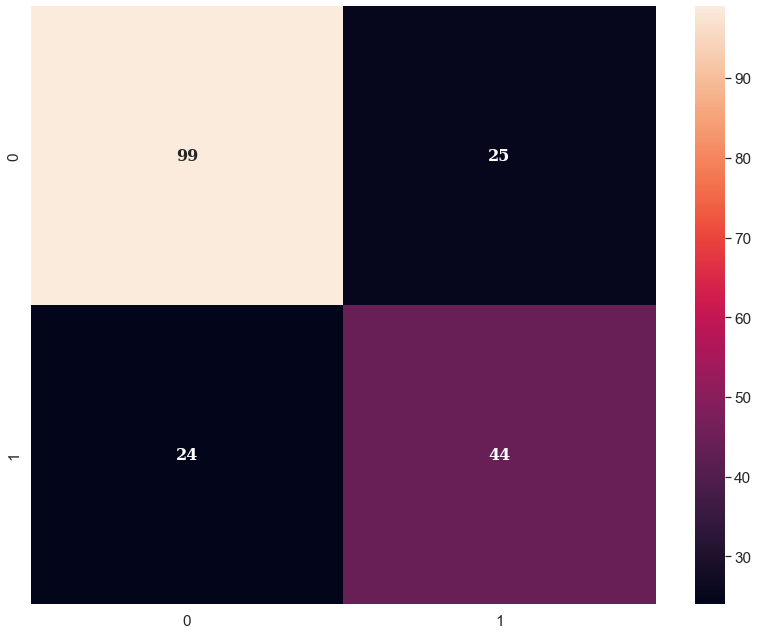

In [85]:
plt.figure(figsize=(14, 11))
sns.heatmap(confusion_matrix(y_test, predict_test), annot=True, annot_kws={
                'fontsize': 16,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            }, fmt='g')

# Regression with KNN using cross-validation

In reggression task we will try to predict patients' age, this might be useful, since sometimes data might be missing, and having a way to replace it meaningfully is a good way.

In [118]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import sklearn

In [102]:
X, y = data_full.drop(columns=['age']), data_full['age']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=17)

In [104]:
X_train

,gender,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,mortality
492,1,3,120,198,0,0,130,1,1.6,2,0,7,0
661,1,3,140,311,0,0,120,1,1.8,2,2,7,0
361,1,3,128,204,1,0,156,1,1.0,2,0,7,0
537,1,3,160,289,0,2,145,1,0.8,2,1,7,0
40,0,2,140,308,0,0,142,0,1.5,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1,2,125,309,0,0,131,1,1.8,2,0,7,0
405,1,3,130,253,0,0,144,1,1.4,1,1,7,0
145,1,1,156,245,0,0,143,0,0.0,2,0,2,1
249,1,2,140,254,0,0,146,0,2.0,1,3,3,0


### Using various neighbours number

In [109]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [114]:
kns = [3, 5, 7]
for k in kns:
    print('Number of neighbours:', k)
    pipe = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')
    print(scores)

Number of neighbours: 3
[0.39513837 0.13681892 0.20795325 0.3551849  0.3581648 ]
Number of neighbours: 5
[0.28119102 0.11448236 0.15030334 0.32946971 0.2938548 ]
Number of neighbours: 7
[0.2007924  0.15794252 0.17986231 0.30395791 0.29044882]


In [121]:
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=3))
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
metrics.r2_score(y_test, y_pred) # should be between -1...1, 1 is the best

0.20794996073759175

# Conclusion:
As it was expected the most advanced model (Random Forest) did the best, it is above 90% of accuracy, SVM is second, with about 83%, which is not so bad but still the model is pretty basic, and the classification task has to deal with complicated data, that is why the result is expected, and the worst is for Naive Bayes, because most likely the features are not independant.
As for regression with did some KKN regression to predict the patients age, and ~0.2 r2 score is not the best, and probably the reason for that is that data about health is not so descriptive in terms of the patients age, because mortality is higher at the late 50th, and less at 20th, but between there is a huge gap in knowledge, and that is the reason why model did not the best.
## Results:
- Random Forest Classification: **91%**
- SVM: **83%**
- Naive Bayes: **74%**
- KNN regression: **0.2** r2 score